In [ ]:
import os
for dirname, _, filenames in os.walk('/content/Black Friday sales.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
train=pd.read_csv("/content/Black Friday sales.csv")
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
135524,1002934,P00131042,F,36-45,20,B,3,0,8,NaN,NaN,5950.0
135525,1002934,P00049542,F,36-45,20,B,3,0,8,NaN,NaN,6005.0
135526,1002934,P00303242,F,36-45,20,B,3,0,5,8.0,NaN,5364.0
135527,1002934,P00222842,F,36-45,20,B,3,0,8,NaN,NaN,8094.0


In [ ]:
train.shape

(135529, 12)

In [ ]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.355290e+05,135529.000000,135529.000000,135529.000000,93339.000000,41376.000000,135528.000000
mean,1.002809e+06,8.088549,0.409093,5.301559,9.854691,12.659054,9300.093700
std,1.721283e+03,6.535047,0.491668,3.742286,5.085732,4.120779,4980.141216
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001322e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5847.000000
50%,1.002664e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8051.000000
75%,1.004258e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12057.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135529 entries, 0 to 135528
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     135529 non-null  int64  
 1   Product_ID                  135529 non-null  object 
 2   Gender                      135529 non-null  object 
 3   Age                         135529 non-null  object 
 4   Occupation                  135529 non-null  int64  
 5   City_Category               135529 non-null  object 
 6   Stay_In_Current_City_Years  135529 non-null  object 
 7   Marital_Status              135529 non-null  int64  
 8   Product_Category_1          135529 non-null  int64  
 9   Product_Category_2          93339 non-null   float64
 10  Product_Category_3          41376 non-null   float64
 11  Purchase                    135528 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 12.4+ MB


In [ ]:
train.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            42190
Product_Category_3            94153
Purchase                          1
dtype: int64

<ipython-input-13-6c6cc8fbcff4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Gender', palette='mako')


<Axes: xlabel='Gender', ylabel='count'>

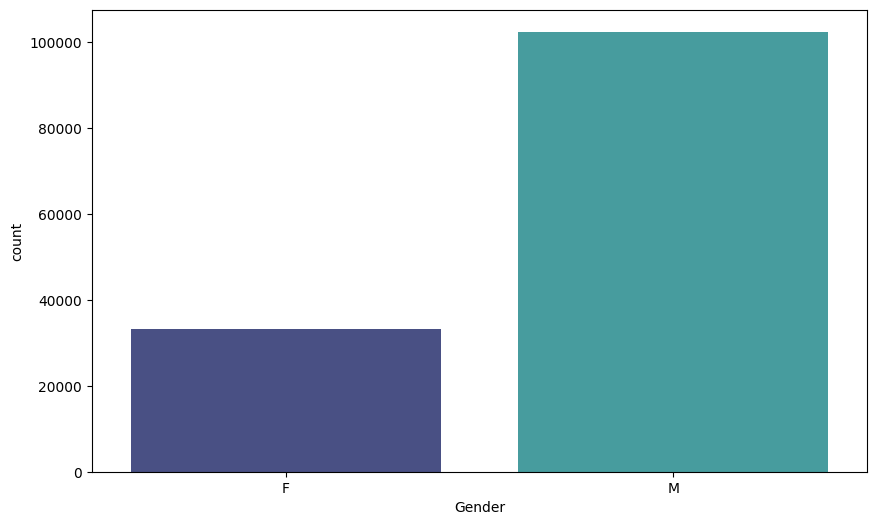

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Gender', palette='mako')

<Axes: xlabel='Gender', ylabel='Marital_Status'>

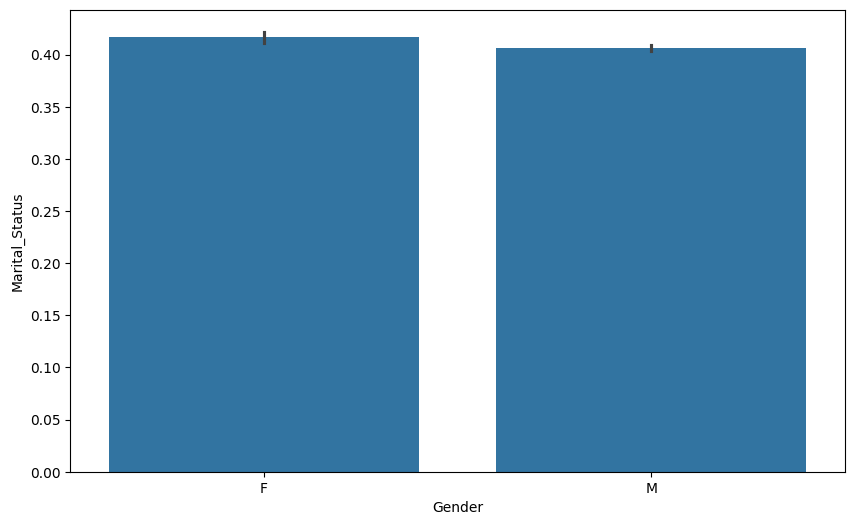

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Marital_Status',data=train)

<Axes: xlabel='Gender', ylabel='Purchase'>

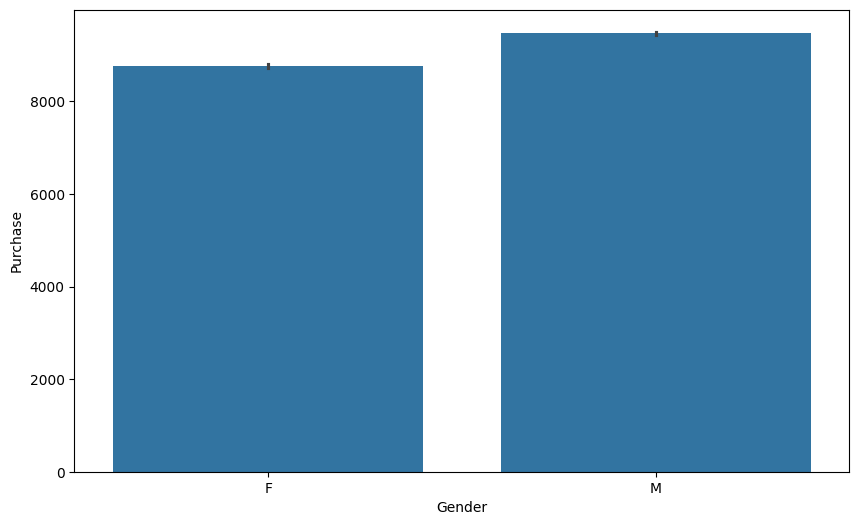

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Purchase',data=train)

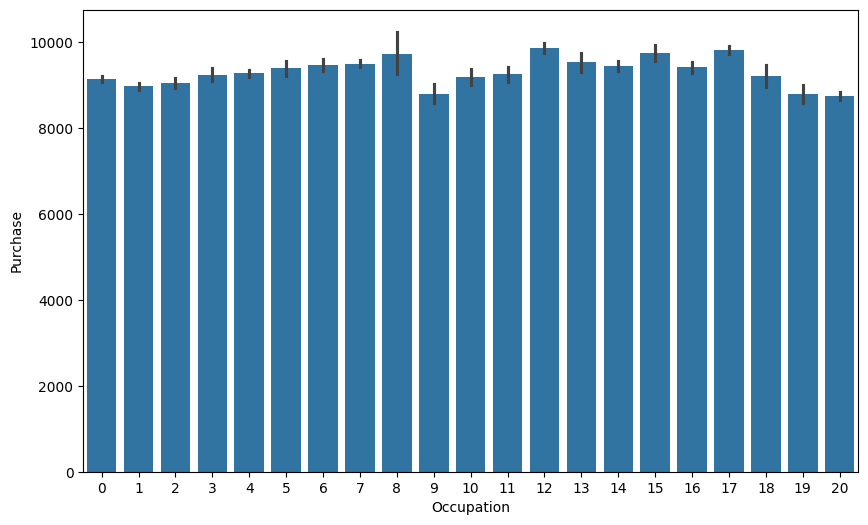

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase',data=train);

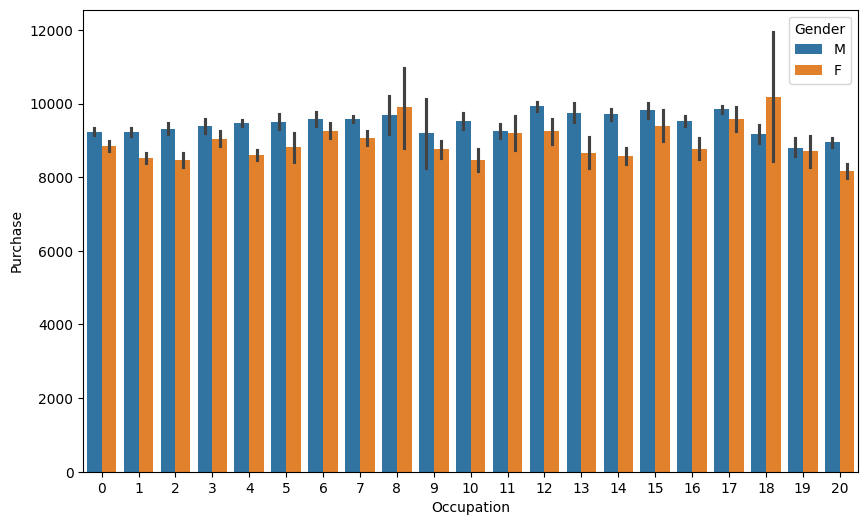

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase',hue='Gender',data=train);

<Axes: xlabel='Gender', ylabel='Purchase'>

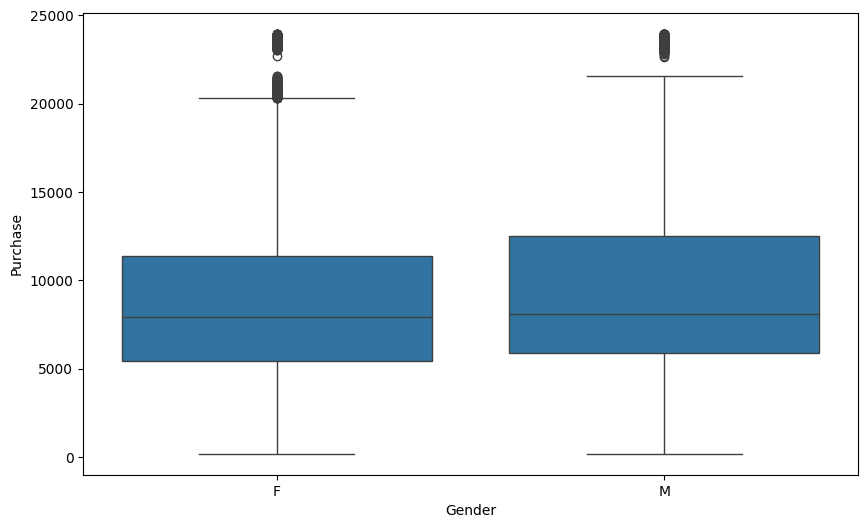

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Purchase',data=train)

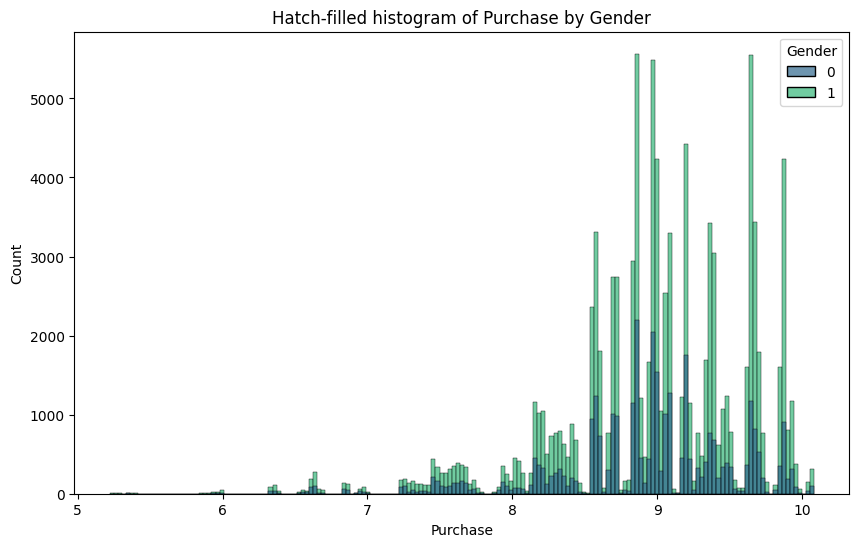

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Purchase', hue='Gender', fill=True, palette='viridis', alpha=0.7)
plt.title('Hatch-filled histogram of Purchase by Gender')
plt.show()


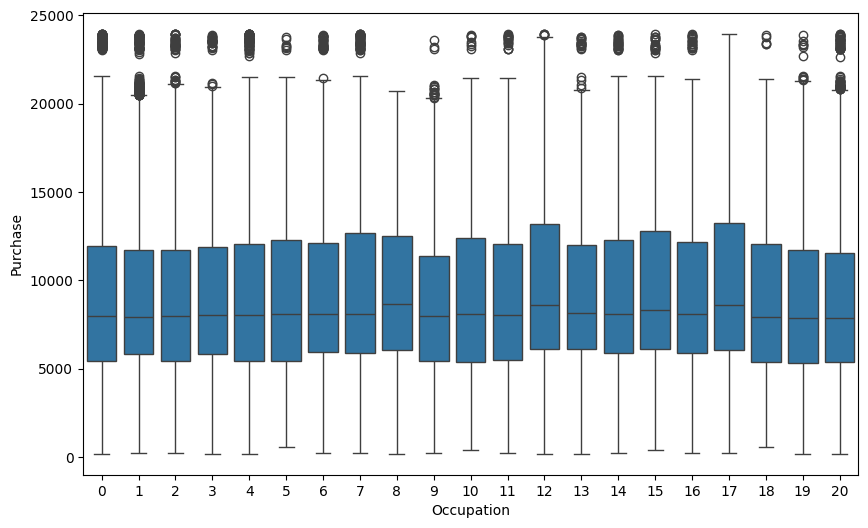

In [ ]:
sns.boxplot(x='Occupation', y='Purchase',data=train);

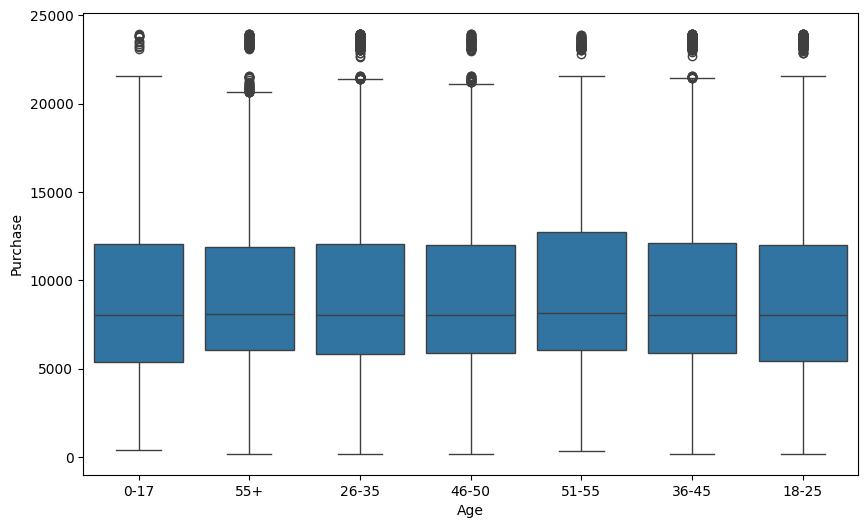

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Age', y='Purchase',data=train);

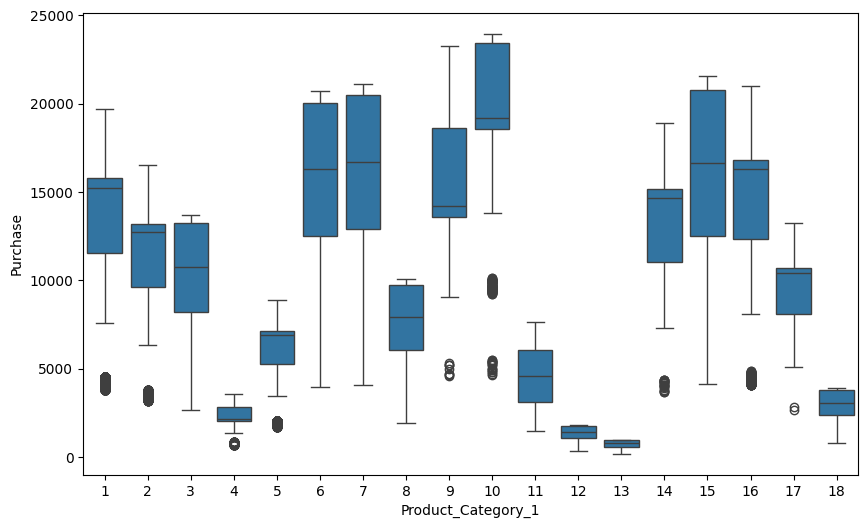

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Product_Category_1', y='Purchase',data=train);

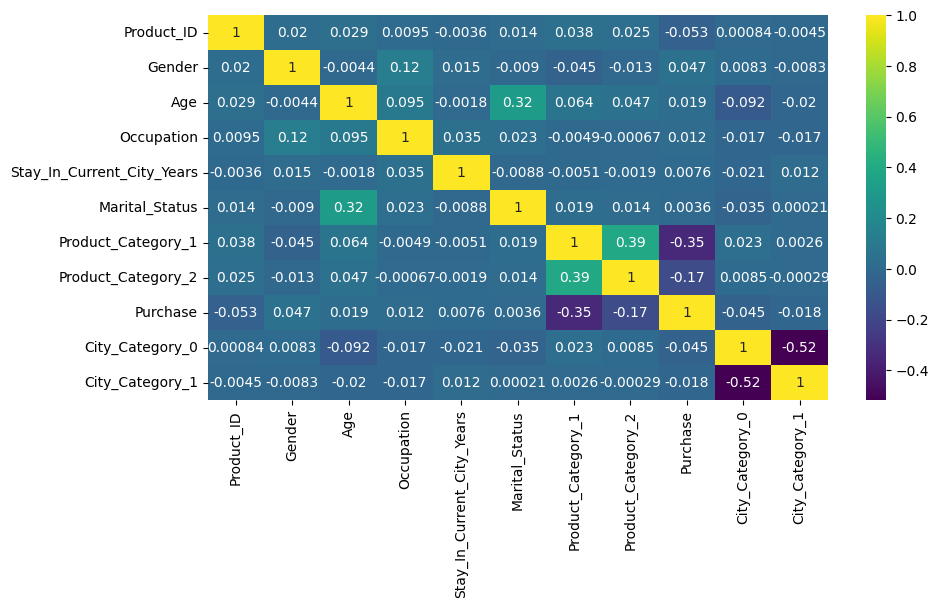

In [ ]:

data = train.iloc[:, 1:-1]

plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap="viridis")
plt.show()


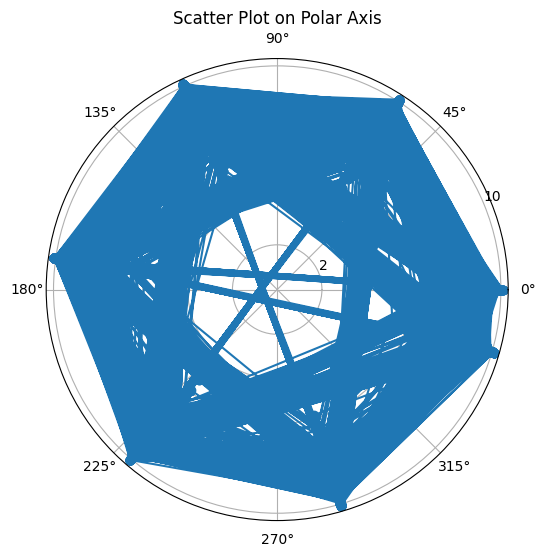

In [ ]:

plt.figure(figsize=(10, 6))

# Create a polar plot with the 'Purchase' column as the radial axis and the 'Age' column as the angular axis
plt.polar(train['Age'], train['Purchase'], marker='o')

# Set the title and show the plot
plt.title('Scatter Plot on Polar Axis')
plt.show()


In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
135524,1002934,P00131042,F,36-45,20,B,3,0,8,NaN,NaN,5950.0
135525,1002934,P00049542,F,36-45,20,B,3,0,8,NaN,NaN,6005.0
135526,1002934,P00303242,F,36-45,20,B,3,0,5,8.0,NaN,5364.0
135527,1002934,P00222842,F,36-45,20,B,3,0,8,NaN,NaN,8094.0


In [ ]:
train['Product_ID'] = train['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
train['Product_ID'] = ss.fit_transform(train['Product_ID'].values.reshape(-1,1))

In [ ]:
train.drop(['Product_Category_3'],axis=1,inplace=True)

In [ ]:
train['Product_Category_2']=train['Product_Category_2'].fillna(train['Product_Category_2'].mean())

In [ ]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      1
dtype: int64

In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.025896,F,0-17,10,A,2,0,3,9.854691,8370.0
1,1000001,0.741476,F,0-17,10,A,2,0,1,6.000000,15200.0
2,1000001,-0.841201,F,0-17,10,A,2,0,12,9.854691,1422.0
3,1000001,-0.864779,F,0-17,10,A,2,0,12,14.000000,1057.0
4,1000002,1.100059,M,55+,16,C,4+,0,8,9.854691,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
135524,1002934,-0.416796,F,36-45,20,B,3,0,8,9.854691,5950.0
135525,1002934,-1.217468,F,36-45,20,B,3,0,8,9.854691,6005.0
135526,1002934,1.274930,F,36-45,20,B,3,0,5,8.000000,5364.0
135527,1002934,0.485065,F,36-45,20,B,3,0,8,9.854691,8094.0


In [ ]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    train[i]=le.fit_transform(train[i])
train.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                      float64
dtype: object

In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.025896,0,0,10,0,2,0,3,9.854691,8370.0
1,1000001,0.741476,0,0,10,0,2,0,1,6.000000,15200.0
2,1000001,-0.841201,0,0,10,0,2,0,12,9.854691,1422.0
3,1000001,-0.864779,0,0,10,0,2,0,12,14.000000,1057.0
4,1000002,1.100059,1,6,16,2,4+,0,8,9.854691,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
135524,1002934,-0.416796,0,3,20,1,3,0,8,9.854691,5950.0
135525,1002934,-1.217468,0,3,20,1,3,0,8,9.854691,6005.0
135526,1002934,1.274930,0,3,20,1,3,0,5,8.000000,5364.0
135527,1002934,0.485065,0,3,20,1,3,0,8,9.854691,8094.0


In [ ]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+','4')

In [ ]:
train['Gender']=train['Gender'].astype(int)
train['Age']=train['Age'].astype(int)
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)

In [ ]:
train['City_Category']=train['City_Category'].astype('category')

In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.025896,0,0,10,0,2,0,3,9.854691,8370.0
1,1000001,0.741476,0,0,10,0,2,0,1,6.000000,15200.0
2,1000001,-0.841201,0,0,10,0,2,0,12,9.854691,1422.0
3,1000001,-0.864779,0,0,10,0,2,0,12,14.000000,1057.0
4,1000002,1.100059,1,6,16,2,4,0,8,9.854691,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
135524,1002934,-0.416796,0,3,20,1,3,0,8,9.854691,5950.0
135525,1002934,-1.217468,0,3,20,1,3,0,8,9.854691,6005.0
135526,1002934,1.274930,0,3,20,1,3,0,5,8.000000,5364.0
135527,1002934,0.485065,0,3,20,1,3,0,8,9.854691,8094.0


In [ ]:
rows=3
cols=3
fig, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=train.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.distplot(train[col[index]],ax=ax[i][j])
        index+=1
plt.tight_layout()

In [ ]:
train['Purchase']=np.log(train['Purchase'])

In [ ]:
train=pd.get_dummies(train)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.025896,0,0,10,2,0,3,9.854691,9.032409,True,False,False
1,1000001,0.741476,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.841201,0,0,10,2,0,12,9.854691,7.259820,True,False,False
3,1000001,-0.864779,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.100059,1,6,16,4,0,8,9.854691,8.983314,False,False,True


In [ ]:
y=train['Purchase']
X=train.drop('Purchase',axis=1)

In [ ]:
X.shape, y.shape

((135529, 12), (135529,))

In [ ]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.025896,0,0,10,2,0,3,9.854691,True,False,False
1,1000001,0.741476,0,0,10,2,0,1,6.000000,True,False,False
2,1000001,-0.841201,0,0,10,2,0,12,9.854691,True,False,False
3,1000001,-0.864779,0,0,10,2,0,12,14.000000,True,False,False
4,1000002,1.100059,1,6,16,4,0,8,9.854691,False,False,True


In [ ]:
y

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
135524    8.691146
135525    8.700348
135526    8.587465
135527    8.998878
135528         NaN
Name: Purchase, Length: 135529, dtype: float64

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(108423, 12) (27106, 12) (108423,) (27106,)


In [ ]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_test_pred=lr.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Check for NaNs in y_test and y_test_pred
print("NaNs in y_test:", np.isnan(y_test).any())
print("NaNs in y_test_pred:", np.isnan(y_test_pred).any())

# If NaNs are present, handle them before calculating metrics.
# Here's a simple example of replacing NaNs with the mean:
if np.isnan(y_test).any():
    y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))
if np.isnan(y_test_pred).any():
    y_test_pred = np.nan_to_num(y_test_pred, nan=np.nanmean(y_test_pred))

# Now calculate the metrics
r2score = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2_score: ', r2score)
print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

NaNs in y_test: True
NaNs in y_test_pred: False
r2_score:  0.1266445463045065
mae:  0.43680440955877475
mse:  0.3630784543761711
rmse:  0.6025599176647672


In [ ]:
dt=DecisionTreeRegressor(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
y_train_preds=dt.predict(X_train)
#predicting on test
y_test_preds=dt.predict(X_test)

In [ ]:
rmse_train=(np.sqrt(metrics.mean_squared_error(y_train,y_train_preds)))
rmse_test=(np.sqrt(metrics.mean_squared_error(y_test,y_test_preds)))
print('rmse train :',str(rmse_train))
print('rmse test :',str(rmse_test))
print('-'*50)
print('RSquared train :', dt.score(X_train,y_train))
print('RSquared test :', dt.score(X_test,y_test))

rmse train : 0.3640627279574006
rmse test : 0.36528854278020917
--------------------------------------------------
RSquared train : 0.6827186406648793
RSquared test : 0.6790313169875737


In [ ]:
rfr=RandomForestRegressor().fit(X_train,y_train)

In [ ]:
y_train_preds_rfr=rfr.predict(X_train)
#predicting on test
y_test_preds_rfr=rfr.predict(X_test)

In [ ]:
rmse_train=(np.sqrt(metrics.mean_squared_error(y_train,y_train_preds_rfr)))
rmse_test=(np.sqrt(metrics.mean_squared_error(y_test,y_test_preds_rfr)))
print('rmse train :',str(rmse_train))
print('rmse test :',str(rmse_test))
print('-'*50)
print('RSquared train :', rfr.score(X_train,y_train))
print('RSquared test :', rfr.score(X_test,y_test))

rmse train : 0.1342439754129629
rmse test : 0.3552652956285883
--------------------------------------------------
RSquared train : 0.9568598422601882
RSquared test : 0.6964039415328052
